In [1]:
import numpy as np

## Note: you must have qcquant installed using pip for this to work
from qcquant import fitting as qcqf

# ## Otherwise, you can just download the code and try something like:
# import sys
# sys.path.append('/the/path/to/the/folder/qcquant/qcquant')
# import qcquant_fitting as qcqf

# Explore the data
First you need to explore the data to find the left and right boundaries of the region to fit 

In [2]:
## Load in the test data
x,d = qcqf.load('./20240411_5.5H_2.3_ra.txt')

## Use `explore_line` to find the left/right boundaries of the fitting region
qcqf.explore_line(x,d)

## Set variables for those left/right boundaries
xl = 4.
xr = 40.

interactive(children=(FloatSlider(value=24.9875, description='x_ind', max=49.97500000000001, step=0.01), Outpu…

# Fit the Data
Now we can begin to fit the data. Begin by initializing the 'naive' guess for the model.

$\rho_0$ = 0.0261 $\\$ $b_{\;}$ = 0.1458 $\\$ $k_g$ = 0.0440 $\\$ $k_c$ = 0.2202 $\\$ $k_d$ = 2.2018 $\\$ $x_g$ = 13.9083 $\\$ $x_d$ = 18.4500 $\\$ 

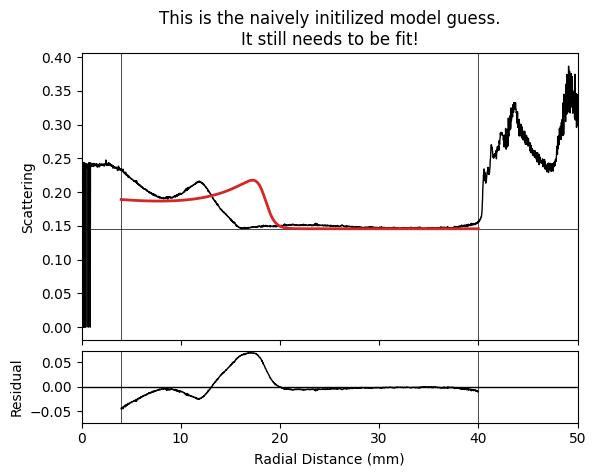

In [3]:
## Initialize the model with some reasonable but naive conditions
theta = qcqf.naive(x,d,xl,xr)

## Show the naive guess by plotting the data/model
fig,ax = qcqf.plot(x,d,xl,xr,theta,x_plotmin=0,x_plotmax=50)
ax[0].set_title('This is the naively initilized model guess.\nIt still needs to be fit!')

## Display the model parameters
qcqf.report(theta)

Now perform the fitting

$\rho_0$ = 0.0241 $\\$ $b_{\;}$ = 0.1487 $\\$ $k_g$ = 0.2195 $\\$ $k_c$ = 0.5505 $\\$ $k_d$ = 1.5054 $\\$ $x_g$ = 9.8160 $\\$ $x_d$ = 12.5318 $\\$ 

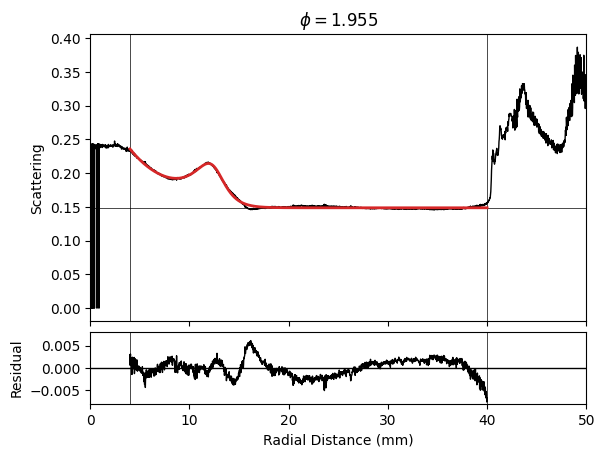

In [4]:
## Perform the fitting using the previous, 'naive' theta as the initial guess
success,theta = qcqf.fit(x,d,xl,xr,guess=theta,repeats=10)

## Show the fitting result by plotting the data/model
fig,ax = qcqf.plot(x,d,xl,xr,theta,x_plotmin=0,x_plotmax=50)

## Display the model parameters
qcqf.report(theta)


# Advanced
Sometimes the guess is bad and/or the fitting fails. Here are some tips for handling this

## Use your own initial guess
The initial guess may have come from a different fit... Perhaps from the same dataset over a different (xl,xr) range

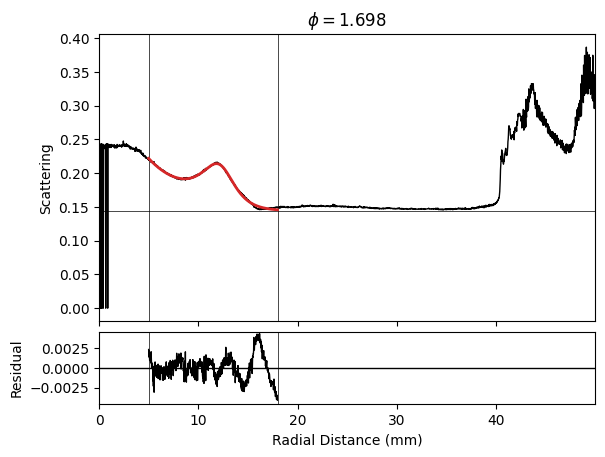

In [5]:
## Here is our own guess. Perhaps this came from a previous fit...
theta = np.array((0.0219,0.1530,0.2992,0.4366,2.2019,9.0518,12.8345))

## Set the left and right boundaries that we want to use
xl = 5
xr = 18

## Perform the fit using this initial guess
success,theta = qcqf.fit(x,d,xl,xr,guess=theta,repeats=10)

## Show the updated fit
fig,ax = qcqf.plot(x,d,xl,xr,theta)

## Use 'Explore' to figure out your own guess
If the guess and/or the fit is particularly bad, you may need to fine-tune your initial guess for the fitting. 

Use the sliders until the fit looks good by eye.

When you're done, copy and paste the 'theta' line as your intial guess. 

In [6]:
## Create the bad guess for this example (you don't need to do this)
theta = np.array((.02,.1,.1,.1,10.,8.,13))

## Use  the explore function
qcqf.explore(x,d,xl,xr,guess=theta)

Output()

interactive(children=(FloatSlider(value=0.02, description='rho0', max=1.0, min=1e-06, step=0.001), FloatSlider…

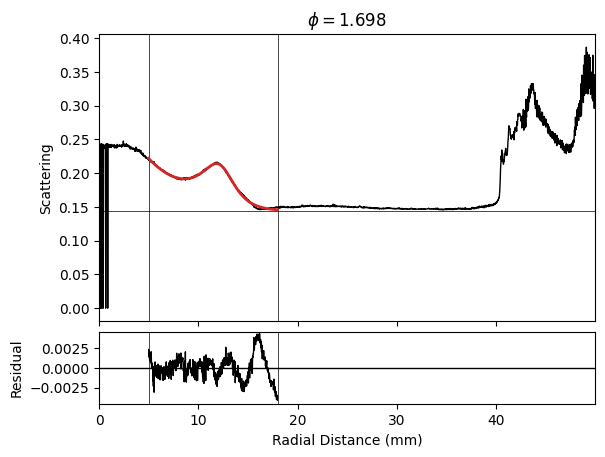

In [7]:
## This is copy/pasted guess from using the explore function above
theta = np.array((0.0280,0.1480,0.2600,0.3890,0.9730,9.6130,13.0000))

## Perform the fitting using this new guess
success,theta = qcqf.fit(x,d,xl,xr,guess=theta,repeats=10)

## Show the fitted model
fig,ax = qcqf.plot(x,d,xl,xr,theta)